<a href="https://colab.research.google.com/github/mahesh-keswani/pytorch-example-notebook/blob/main/7_PyTorchWithCNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def getData(train = False):
    dataset = torchvision.datasets.FashionMNIST(
        root = ".",
        train = train,
        download = True,
        transform = transforms.ToTensor()
    )
    return dataset

In [3]:
# this will return the object with 2 attributes, .data and .targets, where .data contains trainImages, .targets contain trainLabels
trainDataset = getData(train = True)

In [4]:
# 60000 samples with 28x28 dimensions
trainDataset.data.shape

torch.Size([60000, 28, 28])

In [5]:
trainDataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [6]:
# See the data is not normalized
trainDataset.data.max()

tensor(255, dtype=torch.uint8)

In [7]:
# All the same things go with the testDatset as well
testDataset = getData(train = False)

In [8]:
print(f"Test input samples shape {testDataset.data.shape}")
print(f"Test output samples shape {testDataset.targets.shape}")

Test input samples shape torch.Size([10000, 28, 28])
Test output samples shape torch.Size([10000])


In [9]:
# Formula for calculating the output size from convolution
# [(W−K+2P)/S]+1.

# W is the input volume - in your case 128
# K is the Kernel size - in your case 5
# P is the padding - in your case 0 i believe
# S is the stride - which you have not provided.

# Alternatively, we can use this nice website for calculating output size
# https://madebyollin.github.io/convnet-calculator/

In [10]:
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, stride = 2),
            nn.ReLU(),
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 2),
            nn.ReLU()
        )
        
        self.flatten = nn.Flatten()
        
        self.dense_layers = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(2304, 256), # Now inorder to calculate the first parameter for the first linear layer, we need to use the Convolutional Arithematic
            nn.ReLU(), # so, use the above formula
            nn.Dropout(0.3),
            nn.Linear(256, 10)
        )
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.flatten(x)
        x = self.dense_layers(x)
        return x


In [11]:
batchSize = 128
trainLoader = torch.utils.data.DataLoader(
    trainDataset,
    batch_size = batchSize,
    shuffle = True
)

testLoader = torch.utils.data.DataLoader(
    testDataset,
    batch_size = batchSize,
    shuffle = False
)

In [12]:
# NOTE: Whenevr you call the DataLoader, it implicity calls the "transform" function which you had define earlier while loading the data
# Lets look at the single sample
sampleLoader = torch.utils.data.DataLoader(
    trainDataset,
    batch_size = 1,
    shuffle = True
)
for inputs, targets in sampleLoader:
    print(inputs) # Here the data would be normalized
    print(inputs.shape)
    print(targets.shape)
    break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.5804, 0.9333, 0.7608, 0.7686, 0.8118,
           0.9529, 0.6941, 0.0353, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0235,
           0.3529, 0.7294, 0.9843, 0.8667, 0.9529, 0.9804, 0.4314, 0.9412,
           0.9490, 0.8588, 0.9843, 0.8902, 0.5725, 0.1961, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6745, 0.8392,
           0.8627, 0.8353, 0.7804, 0.7569, 0.7176, 0.8588, 0.9137, 0.8627,
           0.7608, 0.7569, 0.7686, 0.8118, 0.8588, 0.8588, 0.7529, 0.0549,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5059, 0.8824, 0.7765,
           0.7647, 0.7529, 0.7765, 0.7725, 0.7686, 0.7529, 0.7373, 0.7451,
           0.7686, 0.7882, 0.7765, 0.7765, 

In [13]:
# input shape = [1, 1, 28, 28] -> batchSize, numberOfChannels, height, width
# target shape = [1] -> batchSize

In [14]:
criterion = torch.nn.CrossEntropyLoss()
model = MyCNN()
optimizer = torch.optim.Adam(model.parameters())

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda


MyCNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense_layers): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=2304, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [16]:
EPOCHS = 10
trainLosses = np.zeros(EPOCHS)
testLosses = np.zeros(EPOCHS)

for epcoh in range(EPOCHS):
    trainLoss = [] # this will have loss per batch
    start = time.time()
    for inputs, targets in trainLoader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        trainLoss.append( loss.item() )

        loss.backward()
        optimizer.step()
    
    # This has loss per epoch
    trainLosses[epcoh] = np.mean( trainLoss )
    
    testLoss = []
    for inputs, targets in testLoader:
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)

        loss = criterion(outputs, targets)
        testLoss.append( loss.item() )
    
    testLosses[epcoh] = np.mean( testLoss )
    took = time.time() - start
    print(f"Epoch {epcoh + 1}, Train Loss = {trainLosses[epcoh]}, Test Loss = {testLosses[epcoh]}, Duration = {took}")

Epoch 1, Train Loss = 0.5748196977542154, Test Loss = 0.44979515728316727, Duration = 13.10549545288086
Epoch 2, Train Loss = 0.38404073402571526, Test Loss = 0.38759772875640963, Duration = 6.212236642837524
Epoch 3, Train Loss = 0.3352102577876943, Test Loss = 0.3485965277952484, Duration = 6.829366207122803
Epoch 4, Train Loss = 0.3066256911452137, Test Loss = 0.3402991345788859, Duration = 6.224876880645752
Epoch 5, Train Loss = 0.28300647459813016, Test Loss = 0.3231964854499962, Duration = 6.261119604110718
Epoch 6, Train Loss = 0.264329071587591, Test Loss = 0.3148691078907327, Duration = 6.3832666873931885
Epoch 7, Train Loss = 0.24742908330995644, Test Loss = 0.30351123232630234, Duration = 6.2596025466918945
Epoch 8, Train Loss = 0.2343463237002206, Test Loss = 0.30459652878815613, Duration = 6.396151781082153
Epoch 9, Train Loss = 0.21939876891656726, Test Loss = 0.29146695061575006, Duration = 6.260446071624756
Epoch 10, Train Loss = 0.20833999217191992, Test Loss = 0.28575

In [17]:
totalCorrect = 0.
totalCount = 0.
for inputs, targets in trainLoader: 
    inputs, targets = inputs.to(device), targets.to(device)

    outputs = model(inputs)

    maxValues, indicesOfMaxValues = torch.max( outputs, axis = 1 )
    totalCorrect += (indicesOfMaxValues == targets).sum().item()
    totalCount += targets.shape[0]

print(f"Train Accuracy {totalCorrect / totalCount}")

totalCorrect = 0.
totalCount = 0.
for inputs, targets in testLoader: 
    inputs, targets = inputs.to(device), targets.to(device)

    outputs = model(inputs)

    maxValues, indicesOfMaxValues = torch.max( outputs, axis = 1 )
    totalCorrect += (indicesOfMaxValues == targets).sum().item()
    totalCount += targets.shape[0]

print(f"Test Accuracy {totalCorrect / totalCount}")

Train Accuracy 0.9288333333333333
Test Accuracy 0.8979


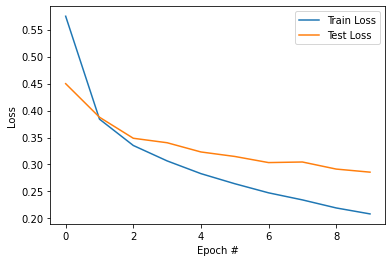

In [18]:
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.plot(trainLosses, label = "Train Loss")
plt.plot(testLosses, label = "Test Loss")
plt.legend();

In [19]:
# Now lets look at some sample where our model incorrectly classifies the image
predictions = np.array([]) # we will store the predictions here and will compare it with targets
for inputs, targets in testLoader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    _, preds = torch.max( outputs, axis = 1 )
    
    # Bring the predictions back in the cpu 
    predictions = np.concatenate( (predictions, preds.cpu().numpy()) )

Confusion matrix, without normalization
[[818   2  10  33   3   0 126   0   8   0]
 [  2 976   0  14   3   0   4   0   1   0]
 [ 15   1 803  11  75   1  94   0   0   0]
 [  8   8   9 921  26   0  28   0   0   0]
 [  1   2  53  26 836   0  81   0   1   0]
 [  0   0   0   1   0 967   0  25   0   7]
 [ 86   3  52  33  55   0 766   0   5   0]
 [  0   0   0   0   0   6   0 984   0  10]
 [  2   1   5   5   3   2  11   4 967   0]
 [  1   0   0   0   0   6   0  60   0 933]]


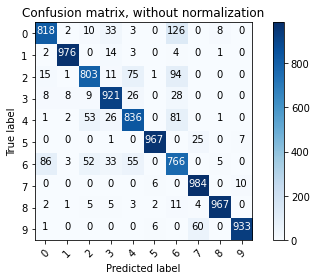

In [20]:
# Refernce for plotting confusion matrix for multiple classes
# https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


y_true = testDataset.targets.numpy()
y_pred = predictions

classes = list( range(10) )
cnf_matrix = confusion_matrix( y_true, y_pred, labels = classes )
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = classes,
                      title='Confusion matrix, without normalization')

In [21]:
classes = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''

classes = classes.split("\n")

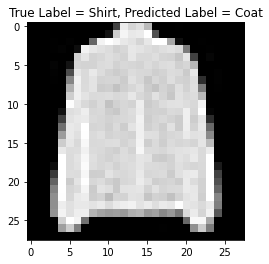

In [22]:
# We can see that the model incorrectly classifies when the input images is 9 and model predicts 4
misclassfied_samples = np.where( y_true != y_pred )[0]
index = np.random.choice(misclassfied_samples)

sampleInput = testDataset.data.numpy()[index]
plt.imshow(sampleInput.reshape(28, 28), cmap = 'gray')
plt.title(f"True Label = {classes[ y_true[index] ]}, Predicted Label = {classes[ int(y_pred[index]) ]}");